# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\rikin\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv("keys.env")
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
grouped_df = sfo_data.groupby("year").mean()
grouped_df

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353         372560        1239
2011           341.903429         374507        1530
2012           399.389968         376454        2324
2013           483.600304         378401        2971
2014           556.277273         380348        3528
2015           632.540352         382295        3739
2016           697.643709         384242        4390

In [5]:
# Save the dataframe as a csv file
grouped_df.to_csv("./Data/yearly_mean_values.csv")

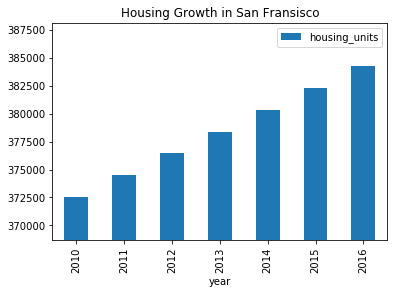

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
mean = np.mean(grouped_df["housing_units"])
stdev = np.std(grouped_df["housing_units"])
minimum = np.min(grouped_df["housing_units"])
maximum = np.max(grouped_df["housing_units"])

grouped_df.plot(kind = "bar", y="housing_units", ylim = ((minimum-stdev),(maximum+stdev)), title = "Housing Growth in San Fransisco")

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

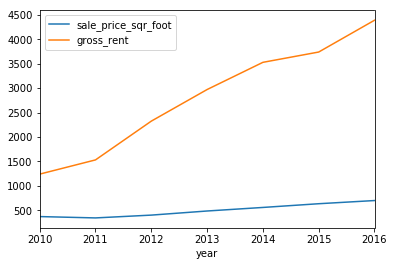

In [7]:
# Calculate the average sale price per square foot and average gross rent

grouped_df.plot(y = ["sale_price_sqr_foot", "gross_rent"])

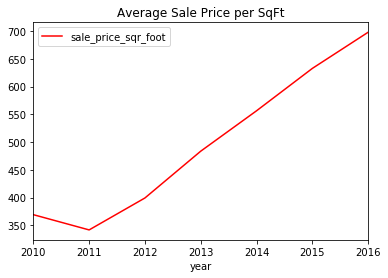

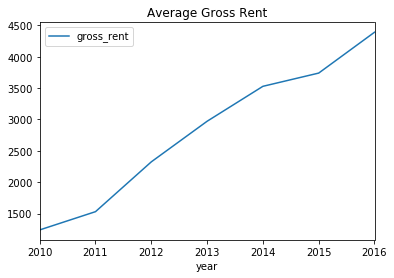

In [8]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
grouped_df.plot(y = ["sale_price_sqr_foot"], color="red", title = "Average Sale Price per SqFt")

# Line chart for average montly rent
grouped_df.plot(y = ["gross_rent"], title = "Average Gross Rent")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby(["year", "neighborhood"]).mean()
neighborhood_df = neighborhood_df.reset_index()
neighborhood_df.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

# def get_sale_price_graph(hood):
#     df = neighborhood_df.loc[neighborhood_df["neighborhood"]==hood].sort_values("year")
#     return df.hvplot(x = "year", y = "sale_price_sqr_foot")
    
# dash = pn.interact(get_sale_price_graph, hood = pn.widgets.Select(options= neighborhood_df["neighborhood"].unique().tolist()))
# dash

neighborhood_df.hvplot(x= "year",y="sale_price_sqr_foot", groupby="neighborhood", title= "Sale Price")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

# def get_gross_rent_graph(hood):
#     df = neighborhood_df.loc[neighborhood_df["neighborhood"]==hood].sort_values("year")
#     return df.hvplot(x = "year", y = "gross_rent")
    
# dash = pn.interact(get_gross_rent_graph, hood = pn.widgets.Select(options= neighborhood_df["neighborhood"].unique().tolist()))
# dash

neighborhood_df.hvplot(x= "year",y="gross_rent", groupby="neighborhood", title= "Gross Rent")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [23]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_df_top_ten = neighborhood_df.groupby(["neighborhood"]).mean()
neighborhood_df_top_ten = neighborhood_df_top_ten.sort_values("sale_price_sqr_foot", ascending=False).reset_index().loc[0:9]
neighborhood_df_top_ten

neighborhood         year  sale_price_sqr_foot  housing_units  \
0  Union Square District  2012.500000           903.993258      377427.50   
1         Merced Heights  2014.000000           788.844818      380348.00   
2          Miraloma Park  2011.750000           779.810842      375967.25   
3        Pacific Heights  2013.000000           689.555817      378401.00   
4          Westwood Park  2015.000000           687.087575      382295.00   
5         Telegraph Hill  2013.000000           676.506578      378401.00   
6       Presidio Heights  2013.000000           675.350212      378401.00   
7             Cow Hollow  2013.000000           665.964042      378401.00   
8           Potrero Hill  2013.000000           662.013613      378401.00   
9            South Beach  2011.666667           650.124479      375805.00   

    gross_rent  
0  2555.166667  
1  3414.000000  
2  2155.250000  
3  2817.285714  
4  3959.000000  
5  2817.285714  
6  2817.285714  
7  2817.285714  
8  2817.285714  
9  2099.000000

In [13]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_df_top_ten.hvplot(kind="bar", x = "neighborhood", y="sale_price_sqr_foot", rot=45, height=400, title= "Top 10 Most Expensive Neighborhoods in SF")

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [14]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [15]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_df.hvplot(kind ="bar", x= "year",y=["sale_price_sqr_foot", "gross_rent"], groupby="neighborhood", title= "Sale Price vs Gross Rent", rot=90, height = 400)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
coord_path = Path("Data/neighborhoods_coordinates.csv")
coordinates = pd.read_csv(coord_path)
coordinates.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
neighborhood_df_grouped = neighborhood_df.groupby("neighborhood").mean().reset_index().drop("year", axis=1)
neighborhood_df_grouped.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [18]:
# Join the average values with the neighborhood locations
neighborhood_df_grouped = pd.concat([neighborhood_df_grouped, coordinates], axis = "columns", join = "inner")
neighborhood_df_grouped.drop(["neighborhood"],axis = 1)
neighborhood_df_grouped = neighborhood_df_grouped[["Neighborhood", "Lat", "Lon", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
neighborhood_df_grouped.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  housing_units  \
0     Alamo Square  37.791012 -122.402100           366.020712       378401.0   
1       Anza Vista  37.779598 -122.443451           373.382198       379050.0   
2          Bayview  37.734670 -122.401060           204.588623       376454.0   
3  Bayview Heights  37.728740 -122.410980           590.792839       382295.0   
4   Bernal Heights  37.728630 -122.443050           576.746488       379374.5   

    gross_rent  
0  2817.285714  
1  3031.833333  
2  2318.400000  
3  3739.000000  
4  3080.333333

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

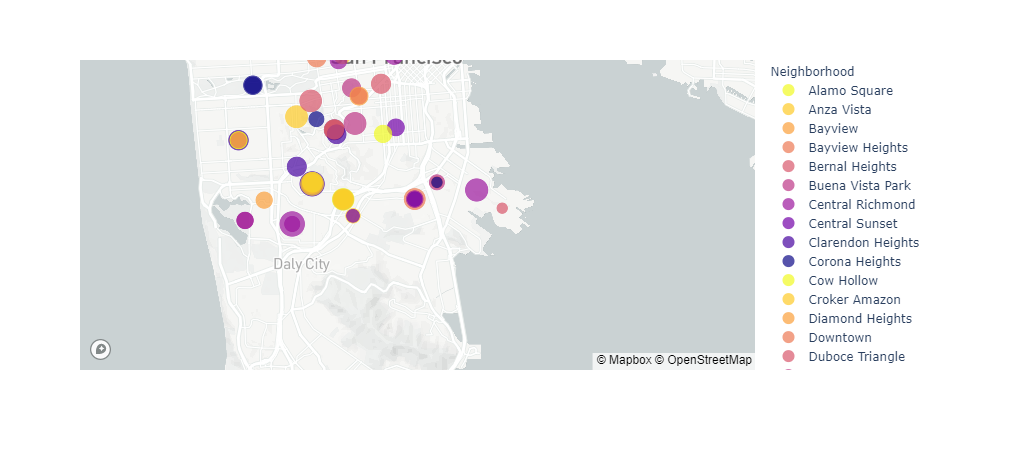

In [32]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    neighborhood_df_grouped,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="Neighborhood",
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    zoom=9
)

map_plot


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [58]:
# Fetch the data from all expensive neighborhoods per year.
neighborhood_yearly_df = neighborhood_df.loc[neighborhood_df['neighborhood'].isin(neighborhood_df_top_ten["neighborhood"])]
neighborhood_yearly_df = neighborhood_yearly_df.groupby(["neighborhood", "year"]).mean().reset_index()
neighborhood_yearly_df

year           neighborhood  sale_price_sqr_foot  housing_units  \
0   2010             Cow Hollow           569.379968         372560   
1   2010          Miraloma Park           680.608729         372560   
2   2010        Pacific Heights           496.516014         372560   
3   2010           Potrero Hill           491.450004         372560   
4   2010       Presidio Heights           549.417931         372560   
5   2010            South Beach          1037.099789         372560   
6   2010         Telegraph Hill           524.793509         372560   
7   2010  Union Square District           569.193448         372560   
8   2011             Cow Hollow           390.595653         374507   
9   2011          Miraloma Park           414.676065         374507   
10  2011        Pacific Heights           509.021480         374507   
11  2011           Potrero Hill           503.138505         374507   
12  2011       Presidio Heights           493.814917         374507   
13  2011            South Beach           388.644337         374507   
14  2011         Telegraph Hill           483.405773         374507   
15  2011  Union Square District           302.123253         374507   
16  2012             Cow Hollow           644.818307         376454   
17  2012         Merced Heights           421.141245         376454   
18  2012          Miraloma Park           756.192373         376454   
19  2012        Pacific Heights           586.218215         376454   
20  2012           Potrero Hill           466.647840         376454   
21  2012       Presidio Heights           426.608592         376454   
22  2012         Telegraph Hill           465.802122         376454   
23  2012  Union Square District           445.196788         376454   
24  2013             Cow Hollow           707.402809         378401   
25  2013        Pacific Heights           503.899261         378401   
26  2013           Potrero Hill           598.704795         378401   
27  2013       Presidio Heights           512.840248         378401   
28  2013         Telegraph Hill           653.311617         378401   
29  2013  Union Square District          1290.472107         378401   
30  2014             Cow Hollow           691.865411         380348   
31  2014         Merced Heights           528.726541         380348   
32  2014          Miraloma Park          1267.766203         380348   
33  2014        Pacific Heights           824.658694         380348   
34  2014           Potrero Hill          1045.201546         380348   
35  2014       Presidio Heights           603.450997         380348   
36  2014            South Beach           524.629312         380348   
37  2014         Telegraph Hill           708.193032         380348   
38  2014  Union Square District           558.271119         380348   
39  2014          Westwood Park           742.979723         380348   
40  2015             Cow Hollow           598.620541         382295   
41  2015        Pacific Heights           910.187690         382295   
42  2015           Potrero Hill           821.300990         382295   
43  2015       Presidio Heights                  NaN         382295   
44  2015         Telegraph Hill           996.990220         382295   
45  2015  Union Square District          2258.702832         382295   
46  2016             Cow Hollow          1059.065602         384242   
47  2016         Merced Heights          1416.666667         384242   
48  2016        Pacific Heights           996.389364         384242   
49  2016           Potrero Hill           707.651609         384242   
50  2016       Presidio Heights          1465.968586         384242   
51  2016         Telegraph Hill           903.049771         384242   
52  2016          Westwood Park           631.195426         384242   

    gross_rent  
0         1239  
1         1239  
2         1239  
3         1239  
4         1239  
5         1239  
6         1239  
7         1239  
8         1530  

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


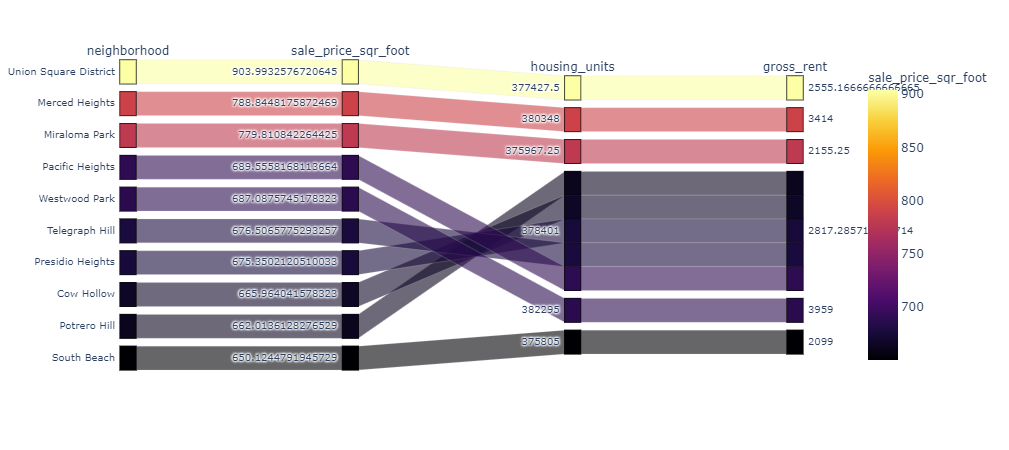

In [61]:
# Parallel Categories Plot
px.parallel_categories(
    neighborhood_df_top_ten,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

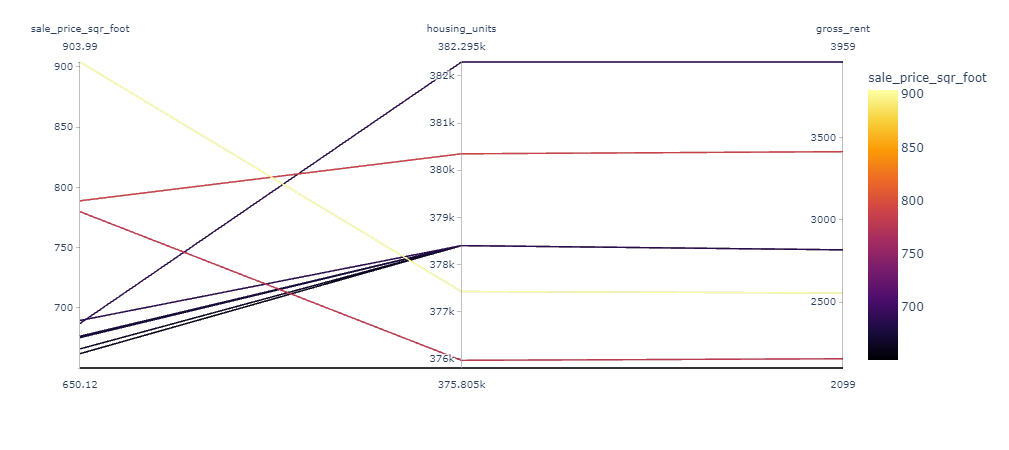

In [62]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    neighborhood_df_top_ten,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

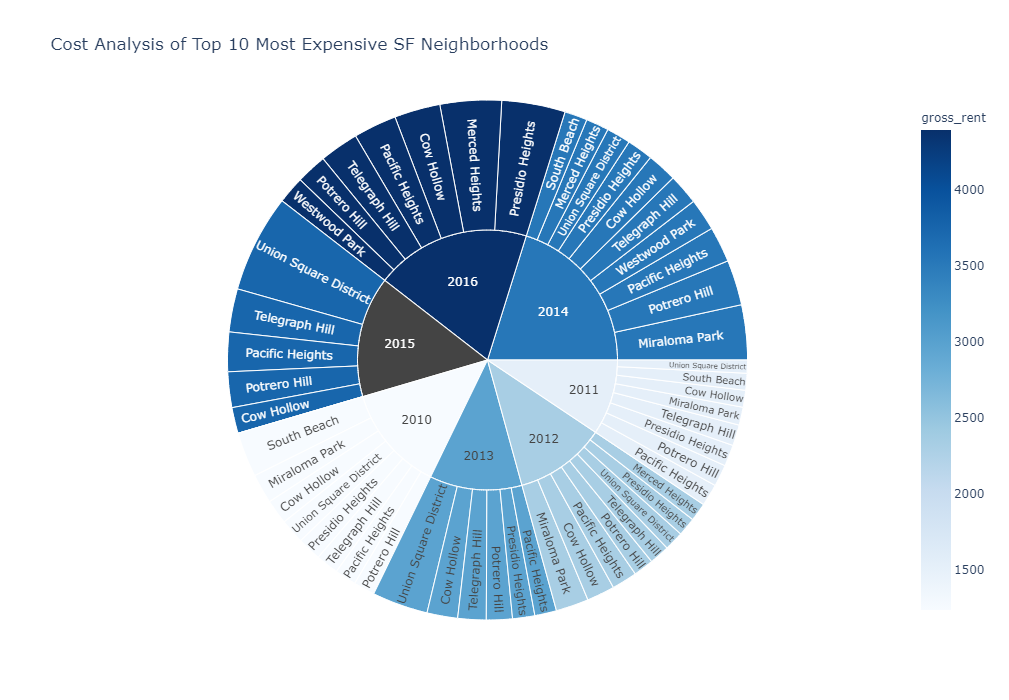

In [70]:
# Sunburst Plot
px.sunburst(neighborhood_yearly_df, path = ["year", "neighborhood"], values="sale_price_sqr_foot", color="gross_rent", title="Cost Analysis of Top 10 Most Expensive SF Neighborhoods",color_continuous_scale='blues', height=700)